<a href="https://colab.research.google.com/github/suraj2906/ObjectDetection/blob/main/YOLOObjectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [278]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [279]:
yolo = cv2.dnn.readNet("./drive/MyDrive/Colab Notebooks/YOLO/yolov3.weights", "./drive/MyDrive/Colab Notebooks/YOLO/yolov3.cfg")

In [368]:
classes = []

with open("/content/drive/MyDrive/Colab Notebooks/YOLO/coco.names", 'r') as f:
  classes = f.read().splitlines()

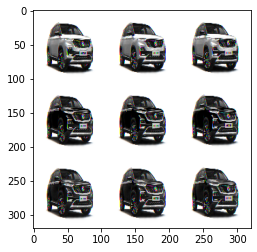

In [382]:
img = cv2.imread("./drive/MyDrive/Colab Notebooks/YOLO/car.jpeg")
blob = cv2.dnn.blobFromImage(img, 1/255, (320,320), (0,0,0), swapRB=True, crop = False)

i = blob[0].reshape(320,320,3)
plt.imshow(i)

In [383]:
yolo.setInput(blob)

In [384]:
output_layer_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layer_name)

In [385]:
print(img.shape)

(1082, 1915, 3)


In [386]:
boxes = []
confidences = []
class_ids = []
width=img.shape[1]
height=img.shape[0]
for output in layeroutput:
  for detection in output:
    score = detection[5:]
    class_id = np.argmax(score)
    confidence = score[class_id]
    if confidence > 0.7:
      center_x = int(detection[0]*width)
      center_y = int(detection[0]*height)
      w = int(detection[0]*width)
      h = int(detection[0]*height)
      x = int(center_x - w/2)
      y = int(center_y - h/2)

      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)
      

In [387]:
len(boxes)

1

In [388]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [389]:
font = cv2.FONT_HERSHEY_COMPLEX
colors = np.random.uniform(0, 255, size = (len(boxes), 3))

In [390]:
for i in indexes.flatten():
  x,y,w,h = boxes[i]
  label = str(classes[class_ids[i]])
  confi = str(round(confidences[i], 2))
  color = colors[i]
  cv2.rectangle(img, (x,y), (x+w, y+h), color, 4)
  cv2.putText(img, label+" "+confi, (x,y-20), font, 3, color, 2)

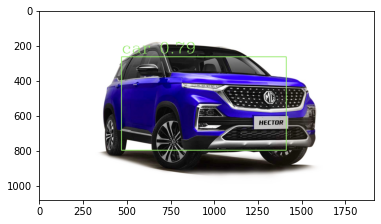

In [391]:
plt.imshow(img)